<a href="https://colab.research.google.com/github/37105571/Data-Cleaning-e-Data-Wrangling-/blob/main/C%C3%B3pia_de_Case_Tunned_no_Modelo_de_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [15]:
churn = pd.read_excel('/content/churn_data.xlsx')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
churn_agg = churn.groupby('Churn')["customerID"].count().reset_index()
churn_agg

,Churn,customerID
0,No,5163
1,Yes,1869


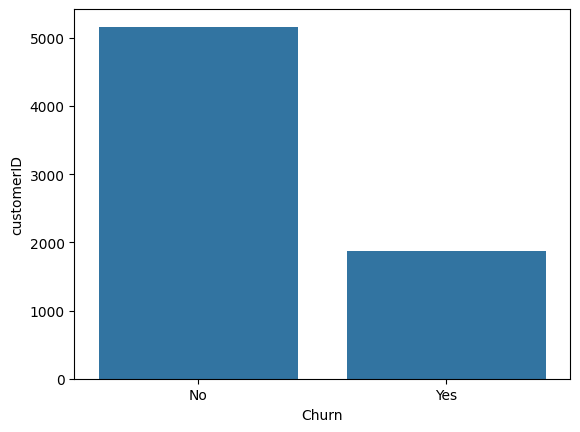

In [18]:
sns.barplot(data= churn_agg, x= 'Churn', y= 'customerID');

In [19]:
churn_parament = churn.groupby('PaymentMethod')['customerID'].count().reset_index()
churn_parament = pd.DataFrame(churn_parament)
churn_parament

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


In [20]:
x = churn.drop(columns= ['customerID', 'Churn'], axis=1)
y = churn[['Churn']]
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7027,No
7028,No
7029,No
7030,Yes


In [21]:
encoder = LabelEncoder()
y['Churn'] = encoder.fit_transform(y['Churn'])
y

<ipython-input-21-dbe420098584>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Churn'] = encoder.fit_transform(y['Churn'])


,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7027,0
7028,0
7029,0
7030,1


In [22]:
x = pd.get_dummies(x)
x

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,False,True,False,True,False,True,...,True,False,True,False,False,True,False,False,False,True
7028,0,72,103.20,7362.90,True,False,False,True,False,True,...,True,False,True,False,False,True,False,True,False,False
7029,0,11,29.60,346.45,True,False,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
7030,1,4,74.40,306.60,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True


In [23]:
mn = MinMaxScaler()
x = pd.DataFrame(mn.fit_transform(x))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [24]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

lr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0, 0, 0, ..., 0, 0, 0])

In [25]:
x_test.assign(Churn= y_test).assign(Churn_pred= lr.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,Churn_pred
6896,0.0,0.563380,0.517413,0.328785,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0
615,0.0,0.098592,0.069652,0.019328,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3248,0.0,0.492958,0.858209,0.423050,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
5197,0.0,0.507042,0.725871,0.388126,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
3515,0.0,0.788732,0.350249,0.350127,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,1.0,0.338028,0.509950,0.200075,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3889,0.0,0.521127,0.020398,0.084301,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
494,0.0,0.295775,0.253731,0.102100,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0
1520,0.0,0.084507,0.023881,0.016172,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0


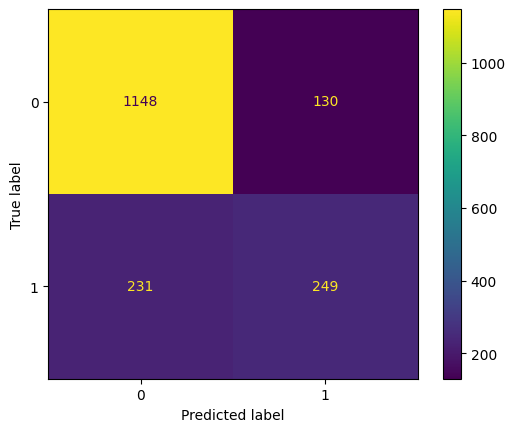

In [26]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, lr.predict(x_test))

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(values_format="d")
plt.show()


In [27]:
print(f"Acurácia Treino: {accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia Teste: {accuracy_score(y_test, lr.predict(x_test))}")

print(f"Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, lr.predict(x_train))}")
print(f"Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, lr.predict(x_test))}")

print(f"Precisão Treino: {precision_score(y_train, lr.predict(x_train))}")
print(f"Precisão Teste: {precision_score(y_test, lr.predict(x_test))}")

print(f"Recall Treino: {recall_score(y_train, lr.predict(x_train))}")
print(f"Recall Teste: {recall_score(y_test, lr.predict(x_test))}")

print(f"F1 Treino: {f1_score(y_train, lr.predict(x_train))}")
print(f"F1 Teste: {f1_score(y_test, lr.predict(x_test))}")

print(f"ROC Treino: {roc_auc_score(y_train, lr.predict_proba(x_train)[:,1])}")
print(f"ROC Teste: {roc_auc_score(y_test, lr.predict_proba(x_test)[:,1])}")

Acurácia Treino: 0.8092529389457717
Acurácia Teste: 0.7946530147895335
Acurácia Balanceada Treino: 0.7264457916725735
Acurácia Balanceada Teste: 0.7085142801251956
Precisão Treino: 0.6666666666666666
Precisão Teste: 0.6569920844327177
Recall Treino: 0.5514758819294456
Recall Teste: 0.51875
F1 Treino: 0.6036249014972419
F1 Teste: 0.5797438882421421
ROC Treino: 0.8511322183028446
ROC Teste: 0.8337229394887846


In [28]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

rf.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [29]:
x_test.assign(Churn= y_test).assign(label= rf.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,label
6896,0.0,0.563380,0.517413,0.328785,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0
615,0.0,0.098592,0.069652,0.019328,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3248,0.0,0.492958,0.858209,0.423050,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
5197,0.0,0.507042,0.725871,0.388126,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
3515,0.0,0.788732,0.350249,0.350127,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,1.0,0.338028,0.509950,0.200075,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3889,0.0,0.521127,0.020398,0.084301,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
494,0.0,0.295775,0.253731,0.102100,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0
1520,0.0,0.084507,0.023881,0.016172,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0


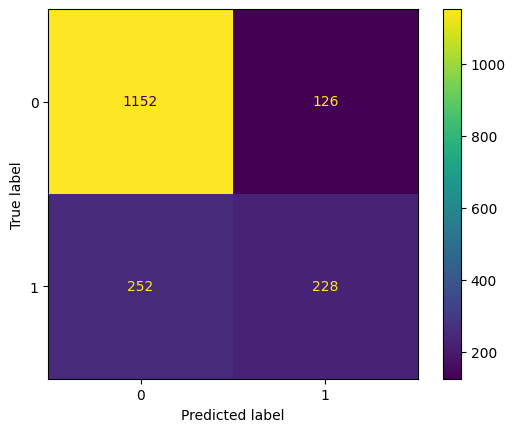

In [30]:
cm = confusion_matrix(y_test, rf.predict(x_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(values_format="d")
plt.show()

In [31]:
print(f"Acurácia Treino: {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia Teste: {accuracy_score(y_test, rf.predict(x_test))}")

print(f"Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, rf.predict(x_test))}")

print(f"Precisão Treino: {precision_score(y_train, rf.predict(x_train))}")
print(f"Precisão Teste: {precision_score(y_test, rf.predict(x_test))}")

print(f"Recall Treino: {recall_score(y_train, rf.predict(x_train))}")
print(f"Recall Teste: {recall_score(y_test, rf.predict(x_test))}")

print(f"F1 Treino: {f1_score(y_train, rf.predict(x_train))}")
print(f"F1 Teste: {f1_score(y_test, rf.predict(x_test))}")

print(f"ROC Treino: {roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])}")
print(f"ROC Teste: {roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])}")

Acurácia Treino: 0.9984831247629883
Acurácia Teste: 0.7849829351535836
Acurácia Balanceada Treino: 0.9985078568231915
Acurácia Balanceada Teste: 0.6882042253521127
Precisão Treino: 0.9956927494615937
Precisão Teste: 0.6440677966101694
Recall Treino: 0.9985601151907847
Recall Teste: 0.475
F1 Treino: 0.9971243709561467
F1 Teste: 0.5467625899280576
ROC Treino: 0.999955710106898
ROC Teste: 0.8105340375586855


In [32]:
parametros = {
      "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
      "n_estimators": [100, 300, 500]
      }
grid_search = GridSearchCV(rf, parametros, scoring= "roc_auc", cv= 5, n_jobs= -1)
grid_search.fit(x_train, y_train)
grid_search.best_estimator_.get_params()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [33]:
rf_tunned = RandomForestClassifier(
bootstrap = True,
ccp_alpha = 0.0,
class_weight = None,
criterion = 'gini',
max_depth = 7,
max_features = 'sqrt',
max_leaf_nodes = None,
max_samples = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
monotonic_cst = None,
n_estimators = 300,
n_jobs = None,
oob_score = False,
random_state = None,
verbose = 0,
warm_start = False
)

rf_tunned
rf_tunned.fit(x_train, y_train)
rf.predict(x_test)



/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0, 0, 0, ..., 0, 0, 0])

In [34]:
x_test.assign(Churn= y_test).assign(label= rf_tunned.predict(x_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,label
6896,0.0,0.563380,0.517413,0.328785,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0
615,0.0,0.098592,0.069652,0.019328,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3248,0.0,0.492958,0.858209,0.423050,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
5197,0.0,0.507042,0.725871,0.388126,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
3515,0.0,0.788732,0.350249,0.350127,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,1.0,0.338028,0.509950,0.200075,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0
3889,0.0,0.521127,0.020398,0.084301,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
494,0.0,0.295775,0.253731,0.102100,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1,0
1520,0.0,0.084507,0.023881,0.016172,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0


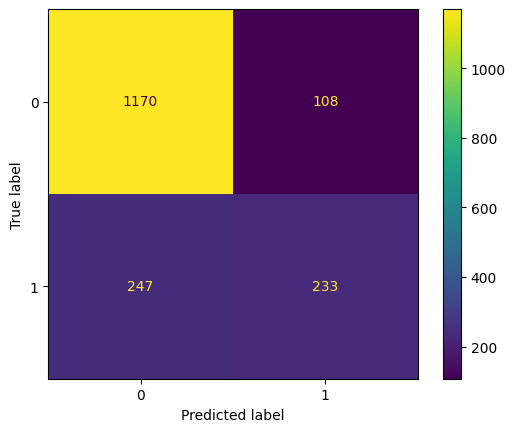

In [35]:
cm = confusion_matrix(y_test, rf_tunned.predict(x_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(values_format="d")
plt.show()

In [36]:
print(f"Acurácia Treino: {accuracy_score(y_train, rf_tunned.predict(x_train))}")
print(f"Acurácia Teste: {accuracy_score(y_test, rf_tunned.predict(x_test))}")

print(f"Acurácia Balanceada Treino: {balanced_accuracy_score(y_train, rf_tunned.predict(x_train))}")
print(f"Acurácia Balanceada Teste: {balanced_accuracy_score(y_test, rf_tunned.predict(x_test))}")

print(f"Precisão Treino: {precision_score(y_train, rf_tunned.predict(x_train))}")
print(f"Precisão Teste: {precision_score(y_test, rf_tunned.predict(x_test))}")

print(f"Recall Treino: {recall_score(y_train, rf_tunned.predict(x_train))}")
print(f"Recall Teste: {recall_score(y_test, rf_tunned.predict(x_test))}")

print(f"F1 Treino: {f1_score(y_train, rf_tunned.predict(x_train))}")
print(f"F1 Teste: {f1_score(y_test, rf_tunned.predict(x_test))}")

print(f"ROC Treino: {roc_auc_score(y_train, rf_tunned.predict_proba(x_train)[:,1])}")
print(f"ROC Teste: {roc_auc_score(y_test, rf_tunned.predict_proba(x_test)[:,1])}")

Acurácia Treino: 0.8251801289343952
Acurácia Teste: 0.79806598407281
Acurácia Balanceada Treino: 0.7317060967168958
Acurácia Balanceada Teste: 0.7004548122065728
Precisão Treino: 0.7295968534906588
Precisão Teste: 0.6832844574780058
Recall Treino: 0.5341972642188625
Recall Teste: 0.48541666666666666
F1 Treino: 0.6167913549459684
F1 Teste: 0.5676004872107187
ROC Treino: 0.8907372043441157
ROC Teste: 0.839746348461137
